# Connected component labeling on surfaces
This notebook demonstrates how to differentiate objects according to their connectivity. 

In [1]:
import napari_process_points_and_surfaces as nppas
import pyclesperanto_prototype as cle
import napari_simpleitk_image_processing as nsitk
from skimage.data import cells3d
import stackview

We use a 3D image of nuclei...

StackViewNDArray([[[5311, 4458, 5880, ..., 4220, 6497, 4932],
                   [4078, 4552, 3557, ..., 4552, 4884, 5169],
                   [3414, 5074, 4363, ..., 4078, 6117, 5406],
                   ...,
                   [3983, 3983, 2750, ..., 4410, 4600, 5880],
                   [3604, 4173, 4600, ..., 5548, 5690, 4268],
                   [4078, 4268, 4220, ..., 5359, 6686, 7492]],

                  [[4220, 4932, 5074, ..., 6449, 6117, 4932],
                   [3082, 4979, 4505, ..., 4505, 6971, 5880],
                   [4695, 4315, 4695, ..., 4742, 5785, 5074],
                   ...,
                   [3414, 3841, 3462, ..., 5169, 4742, 5027],
                   [4173, 3319, 2798, ..., 5406, 4600, 4837],
                   [3225, 3557, 3651, ..., 5453, 5406, 4837]],

                  [[4552, 4505, 4742, ..., 4458, 4979, 4647],
                   [3367, 4268, 4647, ..., 6402, 6022, 5738],
                   [3509, 3272, 4647, ..., 5264, 4220, 6259],
                   ...,
                   [3841, 3936, 3888, ..., 4884, 5169, 4789],
                   [3604, 3225, 2798, ..., 4552, 6117, 5690],
                   [4126, 4458, 4837, ..., 5928, 6734, 5027]],

                  ...,

                  [[5121, 5833, 5738, ..., 5406, 3983, 4220],
                   [5311, 5453, 5453, ..., 5169, 5027, 4884],
                   [6544, 5121, 5264, ..., 4363, 5406, 4695],
                   ...,
                   [4884, 2324, 3130, ..., 4552, 4979, 6070],
                   [3225, 2513, 2513, ..., 4742, 3035, 2418],
                   [3272, 2798, 3888, ..., 3604, 4268, 3746]],

                  [[5359, 5928, 5738, ..., 4268, 4505, 4031],
                   [7445, 6829, 4268, ..., 4884, 5596, 3082],
                   [6497, 6544, 4932, ..., 3604, 5359, 4410],
                   ...,
                   [5833, 2703, 3367, ..., 3177, 4220, 4220],
                   [4031, 3509, 5216, ..., 4268, 3604, 4932],
                   [3557, 2987, 3936, ..., 3604, 3462, 5264]],

                  [[6402, 6781, 4789, ..., 5928, 6022, 3651],
                   [4363, 4837, 6307, ..., 4315, 3651, 4126],
                   [4979, 4695, 4742, ..., 4789, 4837, 4552],
                   ...,
                   [4078, 2513, 3035, ..., 1849, 3888, 4363],
                   [3936, 3888, 4315, ..., 5216, 4031, 5643],
                   [4173, 4505, 3794, ..., 4979, 6781, 4031]]],
                 dtype=uint16)
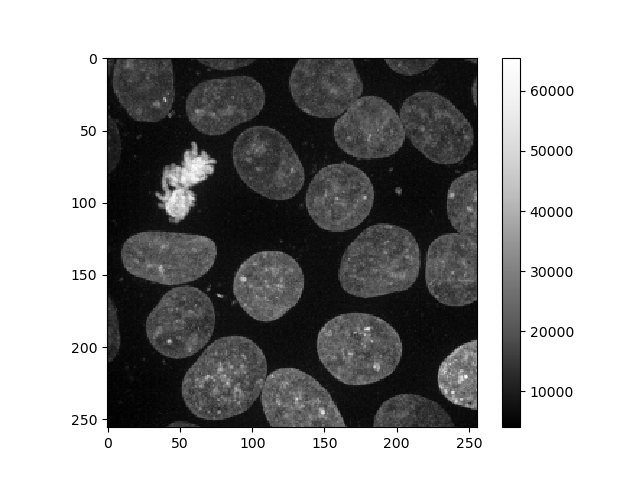
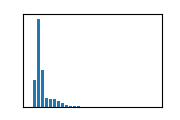

In [2]:
image = cells3d()[:,1]
stackview.insight(image)

... and segment the nuclei resulting in a 3D binary image.

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
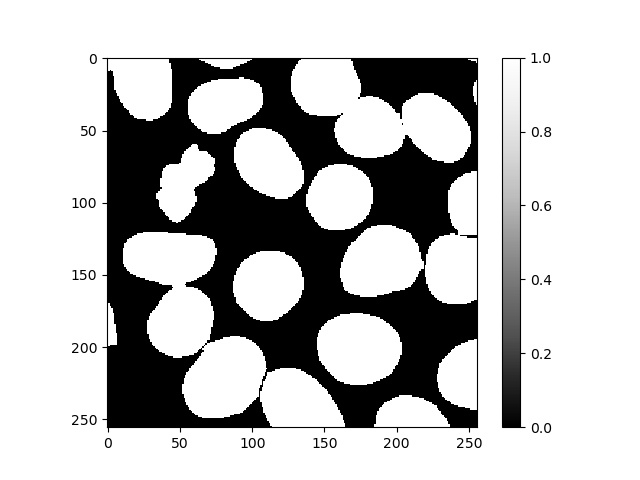
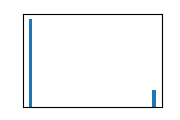

In [3]:
labels = cle.voronoi_otsu_labeling(image, spot_sigma=9)
binary = cle.erode_labels(labels) > 0

stackview.insight(binary)

We convert this binary image into a surface dataset.

label 1


(array([[ 16.5,  79. ,  54. ],
        [ 17. ,  79. ,  53.5],
        [ 17. ,  78.5,  54. ],
        ...,
        [ 59. , 100.5,  46. ],
        [ 58.5, 101. ,  47. ],
        [ 59. , 100.5,  47. ]], dtype=float32),
 array([[     0,      1,      2],
        [     0,      3,      4],
        [     2,      3,      0],
        ...,
        [151196, 151359, 151194],
        [151361, 151359, 151196],
        [151187, 151361, 151196]], dtype=int64))
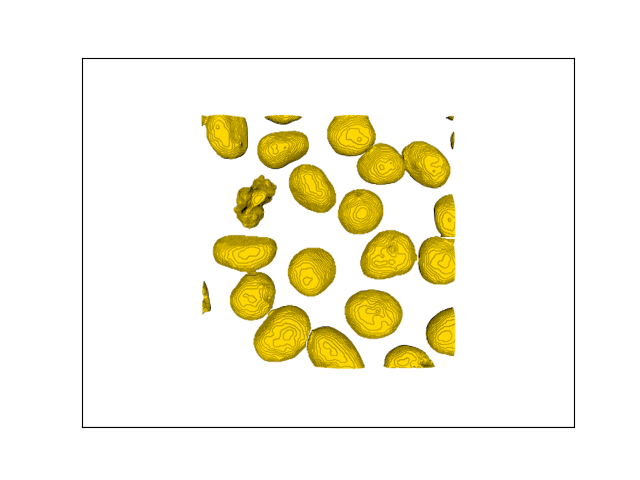

In [4]:
surface = nppas.all_labels_to_surface(binary)
surface

By applying [connected component labeling](https://en.wikipedia.org/wiki/Connected-component_labeling) to the surface, we can identify vertices/faces that are connected and differentiate those which are not. The result is also a surface dataset where the vertex values correspond to the `n`th label these objects belong to. Thus, you can conclude from the maximum number of this surface that thereare 38 nuclei in this image.

In [5]:
surface_connected_components = nppas.split_mesh(surface)
# surface_connected_components.cmap = 'hsv'
# surface_connected_components

In [7]:
surface_connected_components[0]

((array([[ 18.5, 214. ,  77. ],
         [ 19. , 214. ,  76.5],
         [ 19. , 213.5,  77. ],
         ...,
         [ 48.5, 221. ,  94. ],
         [ 48.5, 221. ,  93. ],
         [ 48.5, 220. ,  94. ]], dtype=float32),
  array([[    0,     1,     2],
         [    0,     3,     4],
         [    2,     3,     0],
         ...,
         [10401, 10234, 10235],
         [10400, 10234, 10401],
         [10541, 10400, 10401]], dtype=int64)),
 {},
 'surface')